In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

In [2]:
# Import data from txt format to dataframe
df = pd.read_csv("746Data.txt", delimiter=",",  names=["Peptides", "Result"])

# Seperate all amino acids
peptides = np.array([[df["Peptides"][i][j] for i in range(df.shape[0])] for j in range(8)])

# Store the seperated amino acids into a dataframe
df2 = pd.DataFrame(peptides.T, columns=list('ABCDEFGH'))

df = df.assign(**df2)

df = df.drop(columns="Peptides", axis=0)

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Create some toy data in a Pandas dataframe
# x_data_set = (df.drop(columns = ["Complaint-Status"], axis=0))

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
df = MultiColumnLabelEncoder(columns = df.columns).fit_transform(df)
df.head()

,Result,A,B,C,D,E,F,G,H
0,0,0,0,0,8,4,3,14,13
1,0,0,0,0,10,8,14,6,5
2,0,0,0,0,10,15,15,0,7
3,0,0,0,8,4,3,14,13,6
4,0,0,0,8,4,3,15,11,4


/home/admin1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/admin1/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A

[[ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  8  0  0  0  4  0  0  0  0  0  0  0  0  0  9]
 [ 0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  5  0  0  0 24  0  0  0  0  0  0  0  0  0  9]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  3  0  0  0  4  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  4  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0 10  0  0  0  3  0  0  0  0  0  0  0  0  0  7]
 [ 0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  2  0  0  0  4  0  0  0  0

IndexError: too many indices for array

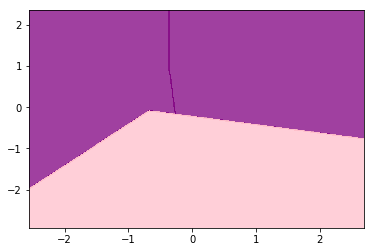

In [4]:
x = df.iloc[:, [1,2,3,4,5,6,7,8]].values
y = df.iloc[:, [0]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

from sklearn.preprocessing import  StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

from sklearn.svm import SVC
classify = SVC(kernel = 'linear', random_state = 0)
classify.fit(x_train, y_train)

y_pred = classify.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train 
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classify.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(("purple", "pink")))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0], x_set[y_set == j,1],
               c = ListedColormap(("yellow", "orange"))(i), label = j)

plt.title("Logistic Regression")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.legend()
plt.show()